In [1]:
from __future__ import division
from scipy import linalg as la
from scipy import optimize
import sympy
import numpy as np
import matplotlib.pyplot as plt
sympy.init_printing()

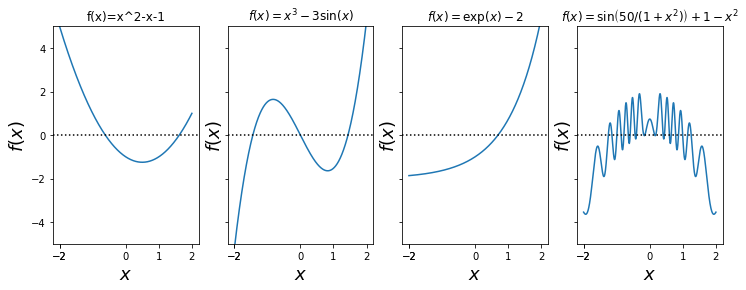

In [10]:
# univariate equations are none linear equatiions depending 
# only on one single variable
# the best way to start solving a non-linear equation is by plotting

x = np.linspace(-2, 2, 1000) # random one thousand numbers from -2, to 2
# Four examples of non-linear functions
f1 = x**2 - x -1
f2 = x**3 -3 * np.sin(x)
f3 = np.exp(x) - 2
f4 = 1 - x**2 + np.sin(50/(1 + x**2))

# plot each function
fig, axes = plt.subplots(1, 4, figsize=(12, 4), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f, lw=1.5)
    axes[n].axhline(0, ls=':', color='k')
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -2, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)
    axes[n].set_ylabel(r'$f(x)$', fontsize=18)
    
titles = [r'f(x)=x^2-x-1', r'$f(x)=x^3-3\sin(x)$', r'$f(x)=\exp(x)-2$', r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$']

for n, title in enumerate(titles):
    axes[n].set_title(title)

Text(0.5, 1.0, 'Bisection method')

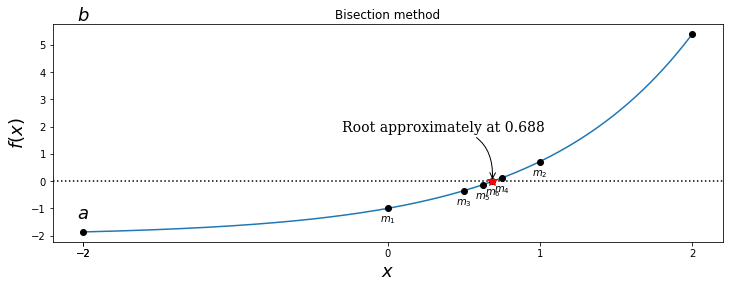

In [21]:
# After plotting, to find approximate location of an equatioin, we can employ
# several numerical root finding techniques, two standard methods are used,
# the bisection method and the newton method

"""
The bisection method
-requires a starting interval [a,b] such that f(a) and f(b) have different signs
-in each iteration the function is evaluated in the middle point m between a and b
-if f(a) and f(m) have opposite signs, then we set m as the new value for b
-if f(b) and f(m) have opposite signns, then we set m as the new value for b

"""
# define a function, desired tolerance and starting interval [a, b]

f = lambda x: np.exp(x) - 2
tol = 0.1
a, b = -2, 2

x = np.linspace(-2,2,1000)

# A graph of the function
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=":", color="k")
ax.set_xticks([-2, -2, 0, 1, 2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)

# find the root using bisection method and visualize the steps in the method graph

fa, fb = f(a), f(b)
ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa +0.5, r"$a$", ha='center', fontsize=18)
ax.text(a, fb +0.5, r"$b$", ha='center', fontsize=18)

n = 1
while b - a > tol:
    m = a + (b - a)/2
    fm = f(m)
    
    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, r'$m_%d$' % n, ha='center')
    
    n += 1
    
    if np.sign(fa) == np.sign(fm):
        a, fa = m, fm
    else:
        b, fb = m, fm
        
ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Root approximately at %.3f" %m,
           fontsize=14, family="serif",
           xy=(a, fm), xycoords='data',
           xytext=(-150, +50), textcoords='offset points',
           arrowprops=dict(arrowstyle="->",
           connectionstyle="arc3, rad=-.5"))

ax.set_title("Bisection method")


Text(0.5, 1, 'Bisection method')

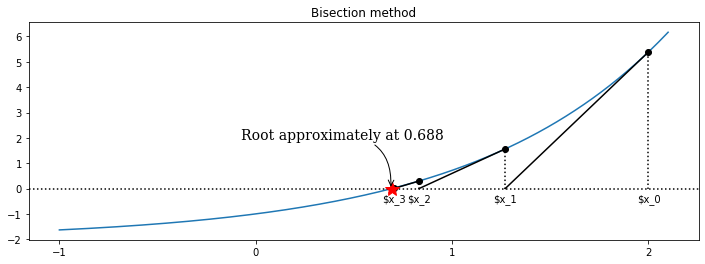

In [26]:
# Newton's method - converges faster than bisection method
# it uses actual function values to obtain an accurate approximation of the nonlinear function
# approximates the equation with its first order taylor expansion f(x+dx) = f(x)+f(x)+dxf'(x)

# define a function, desired tolerance and starting point xk

tol = 0.01
xk = 2

s_x = sympy.symbols("x")
s_f = sympy.exp(s_x) - 2

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)

x = np.linspace(-1, 2.1, 1000)

# setup a graph for visualising the root finding steps
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(x, f(x))
ax.axhline(0, ls=':', color='k')

# iterate Newton's Method until convergence to the desired tolerance
n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk)
    
    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')
    
    xk = xk_new
    n += 1
    
ax.plot(xk, f(xk), 'r*', markersize=15)

ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Root approximately at %.3f" %m,
           fontsize=14, family="serif",
           xy=(a, fm), xycoords='data',
           xytext=(-150, +50), textcoords='offset points',
           arrowprops=dict(arrowstyle="->",
           connectionstyle="arc3, rad=-.5"))

ax.set_title("Bisection method")
ax.set_xticks([-1, 0, 1, 2])

In [28]:
# A potential issue with Newton's method is that it requires both the function values and the 
# values of the derivative of the function in each iteration.
# A variant of Newton's method that ybpasses the requirement to evaluate
# function derivatives is the secant method
"""
the iteration formular for the secant method is xk-1 = xk - f(xk)*(xk-xk-1)/f(xk)-f(xk-1)
The SciPy optimize module provides multiple functions for numerical root finding
The optimize.bisect and optimize.newton function implement variants of bisection
and newtons methods

The optimize.isect takes 3 arguments: first a python function eg a lambda function
that represents the mathematical function
tor which a root is to be calculated
andn the second and the third argument are the lower and upper values of the intervals
for which to perfom the intervals.
The signa have to be different at points a, b for bisection method to work

"""

optimize.bisect(lambda x: np.exp(x) -2, -2, 2)

In [30]:
"""
the function optimize.newton takes a function, an initial guess for the root
of the function as the secon argument

optionally it also takes an argument for specifying the derivative of the function
using fprime keyword.
if fprime is given, newtons method is used otherwise, the secant method is used instead

To find the root of the equation expx - 2 = 0 withouth specifying the derivative
"""

x_root_guess = 2
f = lambda x: np.exp(x) -2
fprime = lambda x: np.exp(x)
print(optimize.newton(f, x_root_guess), "newton's method")
print(optimize.newton(f, x_root_guess, fprime=fprime), "Secant method")

0.6931471805599455 newton's method
0.6931471805599453 Secant method


In [33]:
"""
With this method we have less control over which root is being computed
if the function has multiple roots.
For instance there is no guarantee that the function returns the closest one to
the inittial guess; we cannot know in advance 
if the root is larger or smaller than the initial guess.

The Scipy optimize module provides adititonal functions for root finding

optimize.brentq and optimize.brenth functions are variants of the bisection method
also work on an interval where the function changes sign

the optimize brentq is generally considered the preffered all-round root-finding function
in scipy
to find a root of the same equation..
"""

print(optimize.brentq(lambda x: np.exp(x) -2, -2, 2), "brentq")
print(optimize.brenth(lambda x: np.exp(x) -2, -2, 2), "brenth")

0.6931471805599453 brentq
0.6931471805599381 brenth
